In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('data_science_job.csv')

In [5]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [8]:
df.shape

(19158, 13)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [18]:
df['gender'].isnull().value_counts()

False    14650
True      4508
Name: gender, dtype: int64

In [23]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [24]:
#so we will consider only those columns with null values less than 5%


In [31]:
col=[col for col in df.columns if(df[col].isnull().mean()*100)<=5]

In [32]:
col

['enrollee_id',
 'city',
 'city_development_index',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours',
 'target']

In [35]:
df[col].relevent_experience.value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

In [36]:
df=df[col]

In [37]:
df.head()

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,training_hours,target
0,8949,city_103,0.920,Has relevent experience,no_enrollment,Graduate,20.0,36.0,1.0
1,29725,city_40,0.776,No relevent experience,no_enrollment,Graduate,15.0,47.0,0.0
2,11561,city_21,0.624,No relevent experience,Full time course,Graduate,5.0,83.0,0.0
3,33241,city_115,0.789,No relevent experience,NaN,Graduate,0.0,52.0,1.0
4,666,city_162,0.767,Has relevent experience,no_enrollment,Masters,20.0,8.0,0.0


In [45]:
columns_to_drop=['enrollee_id','city','target','relevent_experience']

In [47]:
df.drop(columns=columns_to_drop,axis=1,inplace=True)

C:\Users\Lucky Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
df.head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0


In [50]:
df.dropna()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [51]:
new_df=df.dropna()

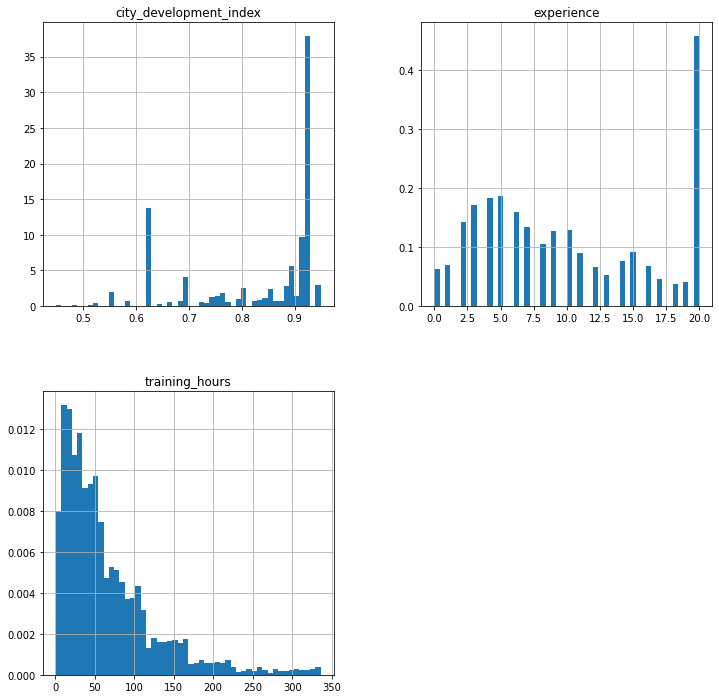

In [52]:
new_df.hist(bins=50,density=True,figsize=(12,12))
plt.show()

<AxesSubplot:>

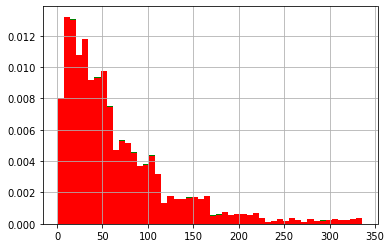

In [57]:
df['training_hours'].hist(bins=50,density=True,color='green')
new_df['training_hours'].hist(bins=50,density=True,color='red')

<AxesSubplot:ylabel='Density'>

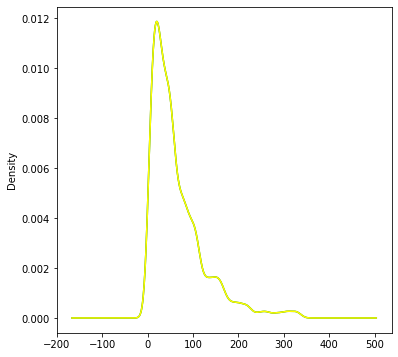

In [63]:
#The Overlapping of Both the Distribution implies MCAR. Hence, CCA can be performed.
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
df['training_hours'].plot.density(color='green')
df['training_hours'].plot.density(color='yellow')

<AxesSubplot:>

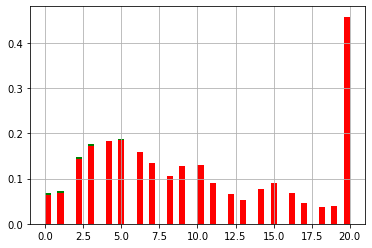

In [64]:
df['experience'].hist(bins=50,density=True,color='green')
new_df['experience'].hist(bins=50,density=True,color='red')

<AxesSubplot:>

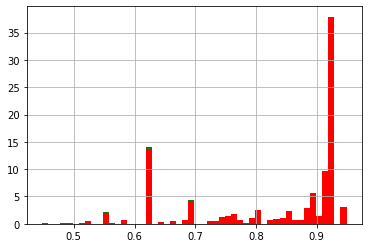

In [65]:
df['city_development_index'].hist(bins=50,density=True,color='green')
new_df['city_development_index'].hist(bins=50,density=True,color='red')

In [66]:
#we can see the hist plot of the new_df and df is appox same,it is MCAR(missing completely at random)

In [69]:
df['enrolled_university'].value_counts()/len(df)*100

no_enrollment       72.121307
Full time course    19.610607
Part time course     6.253262
Name: enrolled_university, dtype: float64

In [70]:
new_df['enrolled_university'].value_counts()/len(df)*100

no_enrollment       65.935901
Full time course    18.002923
Part time course     5.746946
Name: enrolled_university, dtype: float64

In [72]:
df['education_level'].value_counts()/len(df)*100

Graduate          60.538678
Masters           22.763336
High School       10.528239
Phd                2.160977
Primary School     1.607683
Name: education_level, dtype: float64

In [74]:
new_df['education_level'].value_counts()/len(df)*100

Graduate          55.590354
Masters           20.993841
High School        9.630442
Phd                1.983506
Primary School     1.487629
Name: education_level, dtype: float64